In [190]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [191]:
import numpy as np
import pandas as pd

In [192]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [193]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [194]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [195]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [196]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [197]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [198]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [199]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [200]:
# Identify last data point

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [221]:
# Dates for the last 12 months 

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [222]:
# Perform a query to retrieve the data and precipitation scores

precipitation_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()

In [229]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_frame = pd.DataFrame(precipitation_query)
precipitation_frame

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


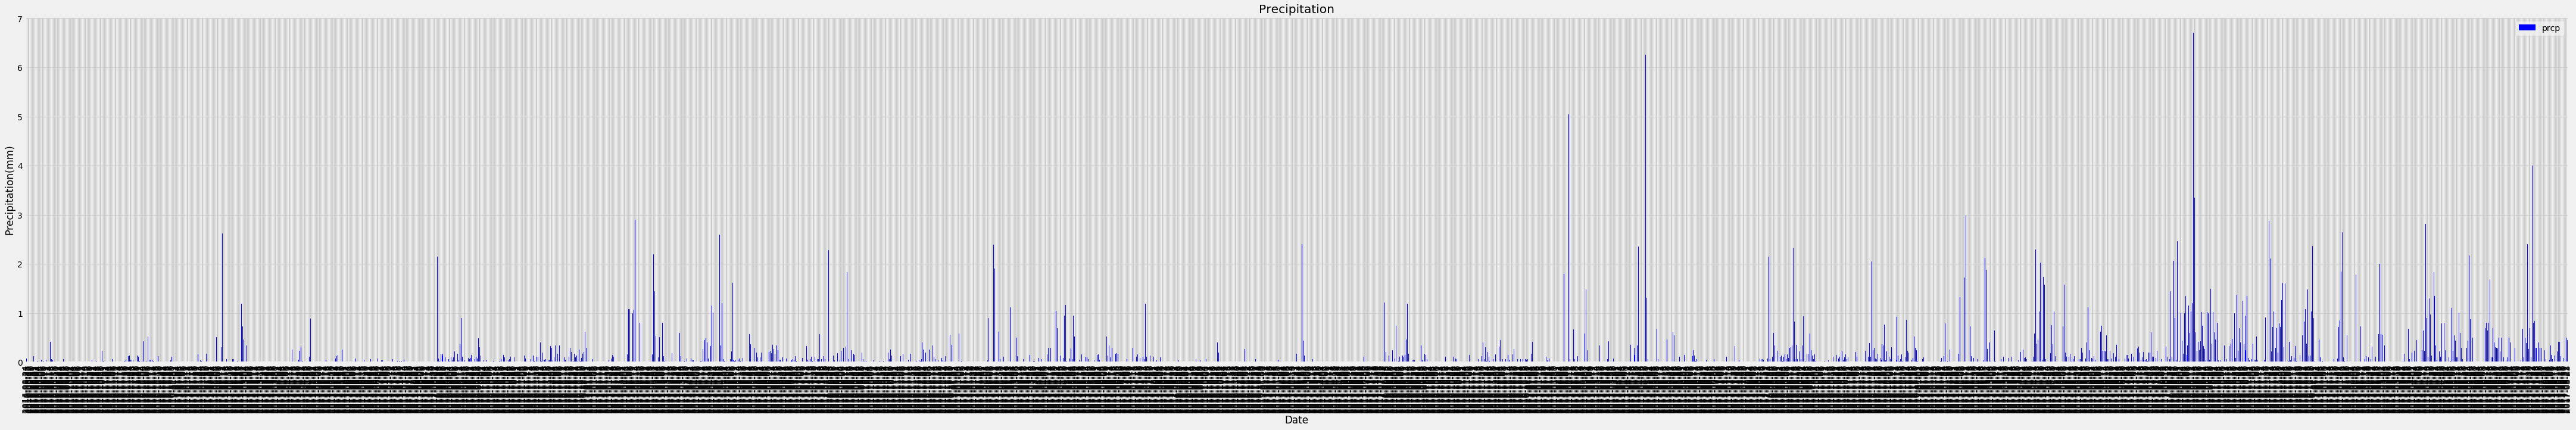

In [230]:
# Use Pandas Plotting with Matplotlib to plot the data
#Bar Chart

precipitation_frame.plot.bar(x= 'date', y= 'prcp', color='blue', figsize=(60,10))
plt.tight_layout()
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation(mm)")
plt.show()


In [231]:
plt.savefig("precipitation.png")

<Figure size 432x288 with 0 Axes>

![precipitation](Images/precipitation.png)

In [235]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_stats = precipitation_frame['prcp'].describe()
prcp_stats_frame = pd.DataFrame(prcp_stats)
prcp_stats_frame

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [247]:
# Design a query to show how many stations are available in this dataset?

stations_count = session.query(Station.station.distinct()).count()
print(f'The number of Stations are =  {stations_count}')

The number of Stations are =  9


In [282]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_counter = (session.query(Measurement.station, func.count(Measurement.station))).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_counter

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [286]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_lowest_temp = (session.query(Measurement.station, func.min(Measurement.tobs))).filter(Measurement.station == 'USC00519281').all()
station_highest_temp = (session.query(Measurement.station, func.max(Measurement.tobs))).filter(Measurement.station == 'USC00519281').all()
station_avg_temp = (session.query(Measurement.station, func.avg(Measurement.tobs))).filter(Measurement.station == 'USC00519281').all()


In [290]:
print(f'Lowest temperature: {station_lowest_temp}')

Lowest temperature: [('USC00519281', 54.0)]


In [291]:
print(f'Highest temperature: {station_highest_temp}')

Highest temperature: [('USC00519281', 85.0)]


In [292]:
print(f'Average temperature: {station_avg_temp}')

Average temperature: [('USC00519281', 71.66378066378067)]


In [296]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [298]:
# Identify date of last data point

last_date_data = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
last_date_data

('2017-08-18')

In [299]:
# Last year Temperature query

last_year_tobs_281 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-18').filter(Measurement.station == 'USC00519281').all()
last_year_tobs_281

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [300]:
#Build data frame to then plot

last_year_tobs_281_frame = pd.DataFrame(last_year_tobs_281)
last_year_tobs_281_frame

,date,tobs
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0
5,2016-08-24,77.0
6,2016-08-25,80.0
7,2016-08-26,80.0
8,2016-08-27,75.0
9,2016-08-28,73.0


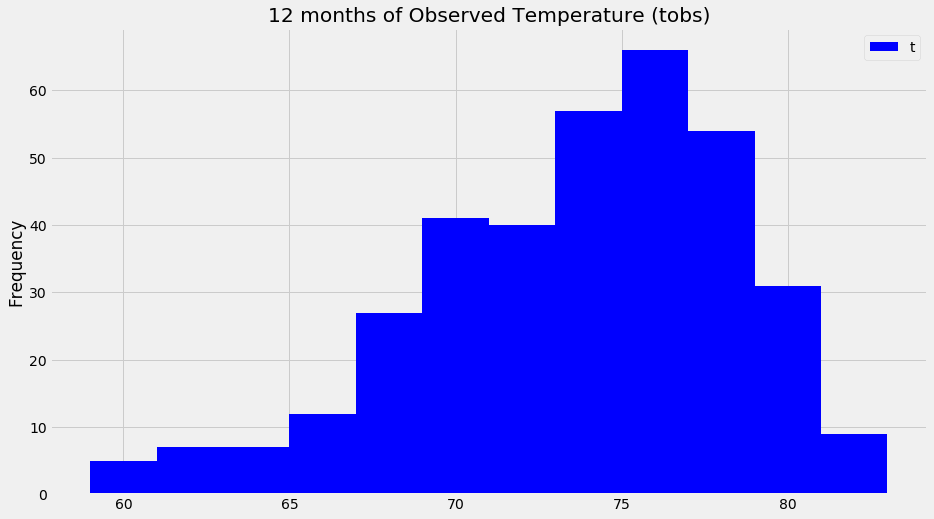

In [302]:
# Plot histogram

# Generate distribution
x = len(last_year_tobs_281_frame)
y = last_year_tobs_281_frame['tobs']

plt.figure(figsize=(14,8))
plt.hist(y, bins=12, color='blue')
plt.ylabel('Frequency')
plt.title('Observed Temperature')
plt.legend('tobs')
plt.show()



In [303]:
# Save plot

plt.savefig("histogram.jpeg")

<Figure size 432x288 with 0 Axes>

## Optional Challenge Assignment

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


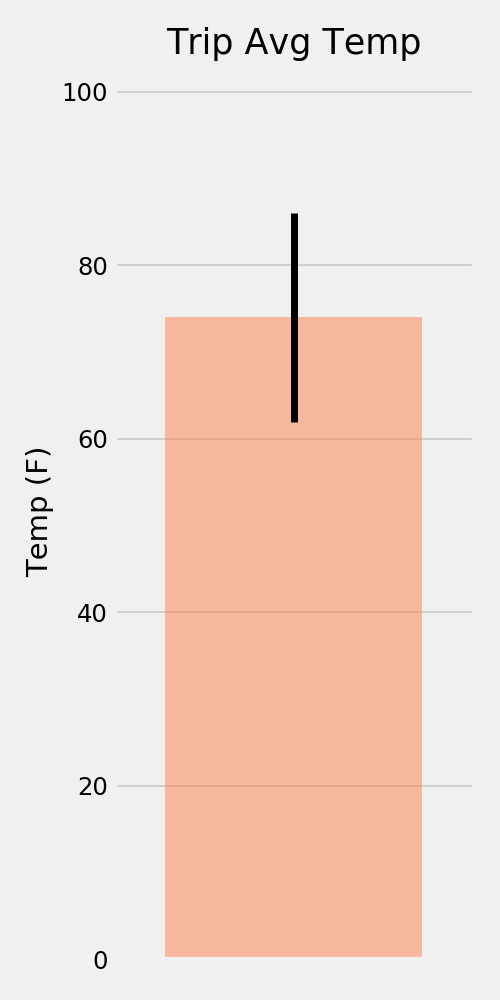

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


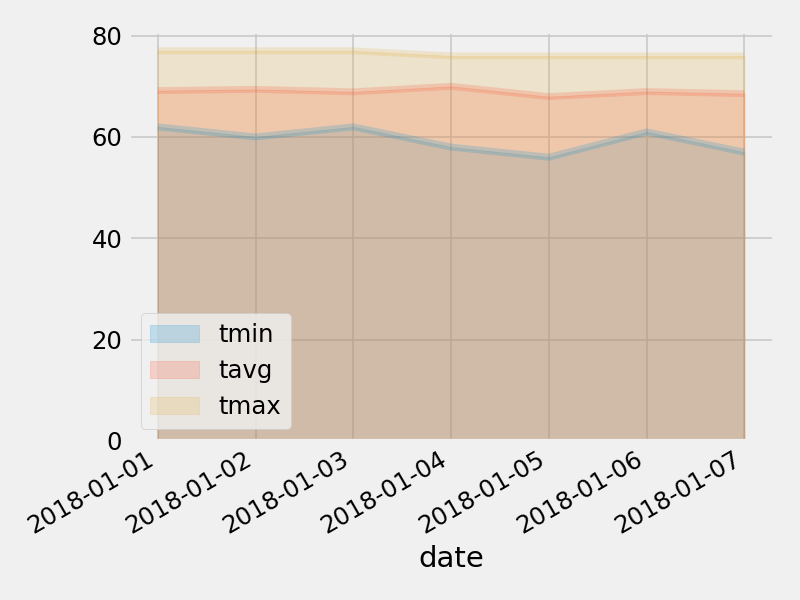

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
